In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lvmdrp.core.image import *
from lvmdrp.functions import imageMethod


def _parse_ccd_section(section):
    slice_x, slice_y = section.strip("[]").split(",")
    slice_x = list(map(lambda str: int(str)-1, slice_x.split(":")))
    slice_y = list(map(lambda str: int(str)-1, slice_y.split(":")))
    return slice_x, slice_y


In [2]:
raw_frame_path = "/home/mejia/Research/UNAM/lvm-drp/data.sdss5.org/sas/sdsswork/data/lvm/lab/59514/sdR-s-b1-00000859.fits.gz"
raw_frame_path = "/home/mejia/Research/UNAM/lvm-drp/data.sdss5.org/sas/sdsswork/data/lvm/lab/59898/sdR-s-b3-00006775.fits.gz"
ccdsec = None
positions = None
orientation = None
subtract_overscan = True
compute_error = True
gain = None
rdnoise = None

raw_frame = loadImage(raw_frame_path)
raw_frame._header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4120                                                  
NAXIS2  =                 4080                                                  
V_ARCHON= '0.6.2   '                                                            
FILENAME= 'sdR-s-b3-00006775.fits.gz' / File basename                           
EXPOSURE=                 6775 / Exposure number                                
SPEC    = 'sp3     '           / Spectrograph name                              
OBSERVAT= 'SBS     '           / Observatory                                    
OBSTIME = '2022-11-15T21:09:26.403' / Start of the observation                  
MJD     =                59898 / Modified Julian Date                           
EXPTIME =                  5

In [3]:
imageMethod.old_preprocRawFrame_drp(in_image=raw_frame_path, out_image="xxx.fits", boundary_x="1,2040", boundary_y="1,2040", positions="00,10,01,11", orientation="S,S,S,S")
preproc_image = loadImage("xxx.fits")
preproc_image._header

imageMethod.preprocRawFrame_drp(in_image=raw_frame_path, out_image="yyy.fits")
new_preproc_image = loadImage("yyy.fits")
new_preproc_image._header


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4080                                                  
NAXIS2  =                 4080                                                  
V_ARCHON= '0.6.2   '                                                            
FILENAME= 'sdR-s-b3-00006775.fits.gz' / File basename                           
EXPOSURE=                 6775 / Exposure number                                
SPEC    = 'sp3     '           / Spectrograph name                              
OBSERVAT= 'SBS     '           / Observatory                                    
OBSTIME = '2022-11-15T21:09:26.403' / Start of the observation                  
MJD     =                59898 / Modified Julian Date                           
EXPTIME =                  5

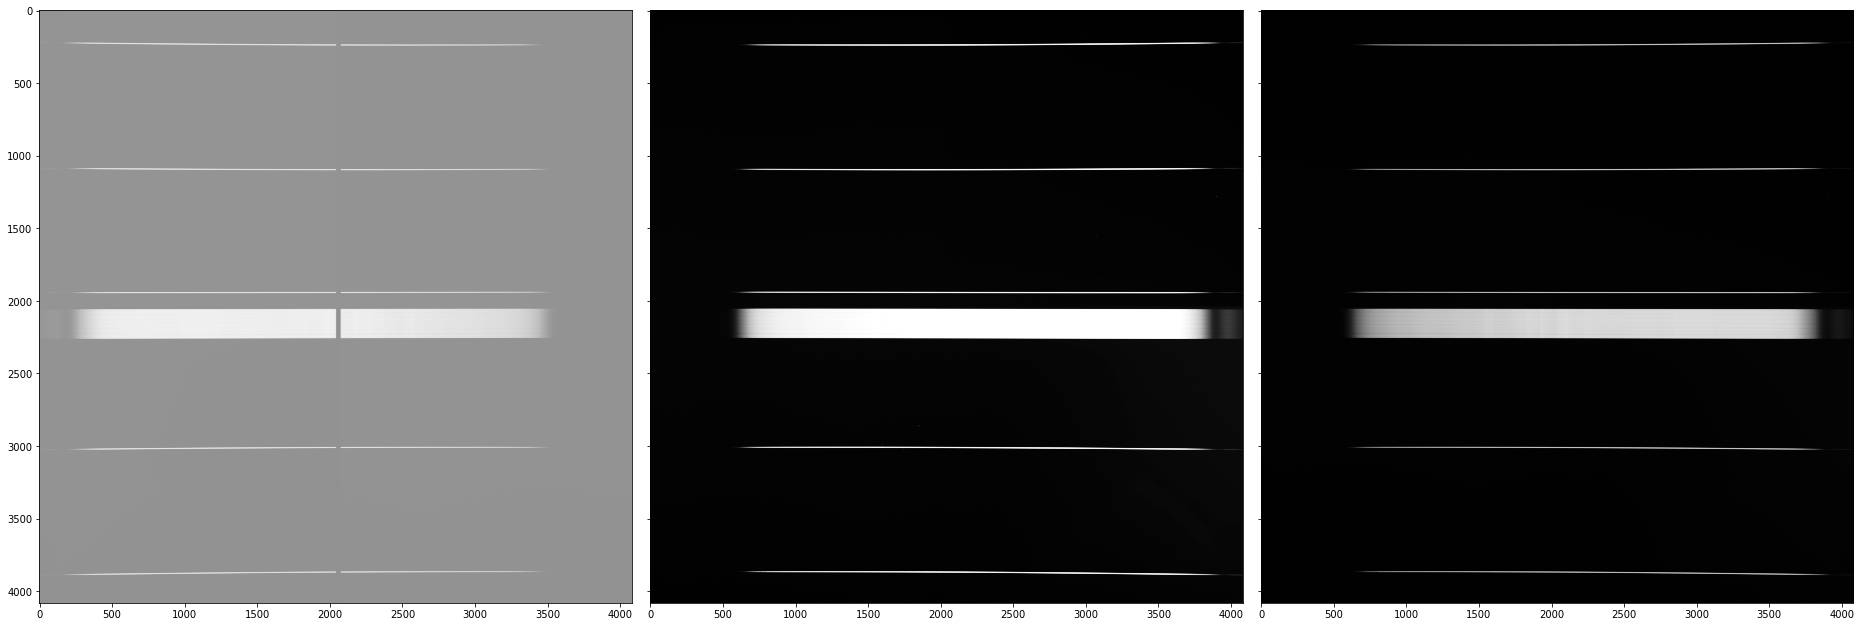

In [5]:
from astropy.visualization import simple_norm


fig, axs = plt.subplots(1, 3, figsize=(26,10), sharex=True, sharey=True)

images = [raw_frame._data, preproc_image._data, new_preproc_image._data]
norm = simple_norm(images[-1], stretch="asinh")

for i in range(len(images)):
    axs[i].imshow(images[i], norm=norm, cmap="Greys_r")

fig.tight_layout()